In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
def draw(folder, node_num):
    filenames = [f"{folder}r{i}-tacc-poison-100.log" for i in range(0, node_num)]

    data = {f"node{i}": [] for i in range(1, node_num+1)}

    for i, filename in enumerate(filenames, 1):
        with open(filename, 'r') as file:
            data[f"node{i}"] = [float(line.strip()) for line in file if line.strip()]

    plt.figure(figsize=(15, 6))
    for node, values in data.items():
        plt.plot(values, label=node)

    plt.xlabel('epoch')
    plt.ylabel('poison_acc')
    plt.legend()
    plt.show()

In [96]:
def draw_nodes(folder, nodes):
    filenames = {node: f"{folder}r{node}-tacc-poison-20.log" for node in nodes}

    data = {}

    for node, filename in filenames.items():
        with open(filename, 'r') as file:
            data[f"node{node}"] = [float(line.strip()) for line in file if line.strip()]

    plt.figure(figsize=(15, 6))
    for node, values in data.items():
        plt.plot(values, label=node)

    plt.xlabel('epoch')
    plt.ylabel('poison_acc')
    plt.legend()
    plt.show()

In [62]:
def draw_test_nodes(folder, nodes):
    filenames = {node: f"{folder}r{node}-tacc-poison-0.log" for node in nodes}

    data = {}

    for node, filename in filenames.items():
        with open(filename, 'r') as file:
            data[f"node{node}"] = [float(line.strip()) for line in file if line.strip()]

    plt.figure(figsize=(15, 6))
    for node, values in data.items():
        plt.plot(values, label=node)

    plt.xlabel('epoch')
    plt.ylabel('poison_acc')
    plt.legend()
    plt.show()

In [19]:
def cal_avg(folder, node_num):
    filenames = [os.path.join(folder, f"r{i}-tacc-poison-100.log") for i in range(0, node_num)]
    
    all_epochs = []

    for filename in filenames:
        with open(filename, 'r') as file:
            values = [float(line.strip()) for line in file if line.strip()]
            all_epochs.append(values)

    averages = [sum(epoch_values) / node_num for epoch_values in zip(*all_epochs)]
    
    return averages

In [78]:
def draw_together(folders, node_num, legends):
    plt.figure(figsize=(15, 6))
    
    marker = '^'
    for i, folder in enumerate(folders):
        averages = cal_avg(folder, node_num)
        sample_avgs = averages[:15]
        epochs = list(range(1, 3001, 200))
        plt.plot(epochs, sample_avgs, marker=marker, label=legends[i])
    
    plt.xlabel('epoch')
    plt.ylabel('average attack success rate')
    plt.legend()
    plt.show()

In [79]:
def draw_mnist_together(folders, node_num, legends):
    plt.figure(figsize=(15, 6))
    
    marker = '^'
    for i, folder in enumerate(folders):
        averages = cal_avg(folder, node_num)
        sample_avgs = averages[:40]
        epochs = list(range(1, 201, 5))
        plt.plot(epochs, sample_avgs, marker=marker, label=legends[i])
    
    plt.xlabel('epoch')
    plt.ylabel('average attack success rate')
    plt.legend()
    plt.show()

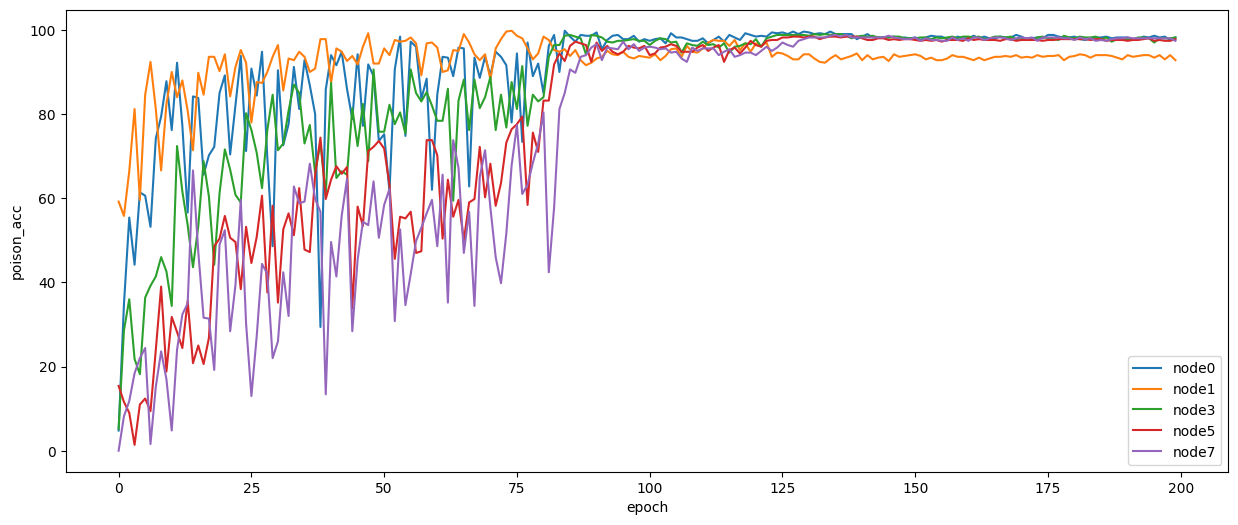

In [59]:
nodes = [0, 1, 3, 5, 7]
draw_nodes("Output/DBA-linear-swift-iid-DBA-datasets-linear8-all-test-200/adv3-all/", nodes)


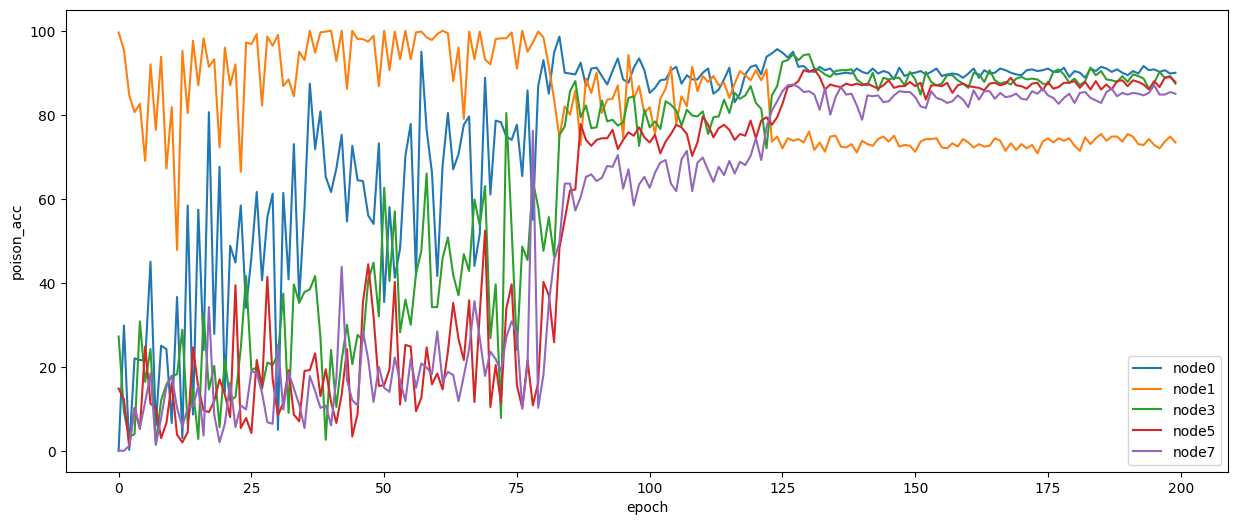

In [64]:
nodes = [0, 1, 3, 5, 7]
draw_test_nodes("Sequences/bkd-all-ring20-test/", nodes)

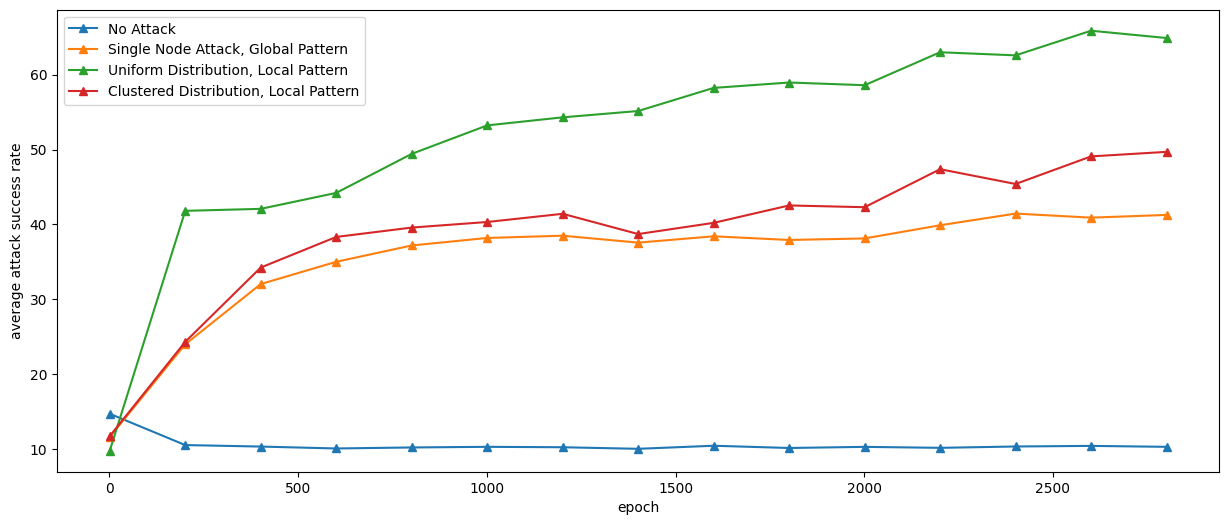

In [80]:
folders = ['Output/DBA-ring-swift-iid-DBA-0-3001/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-1-1g-3000/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-1-3001/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-1-cluster-4l-3000/adv3-all/',]
legends = ['No Attack',
           'Single Node Attack, Global Pattern',
           'Uniform Distribution, Local Pattern',
           'Clustered Distribution, Local Pattern']
draw_together(folders, 40, legends)

# SWIFT

## CIFAR

### ring

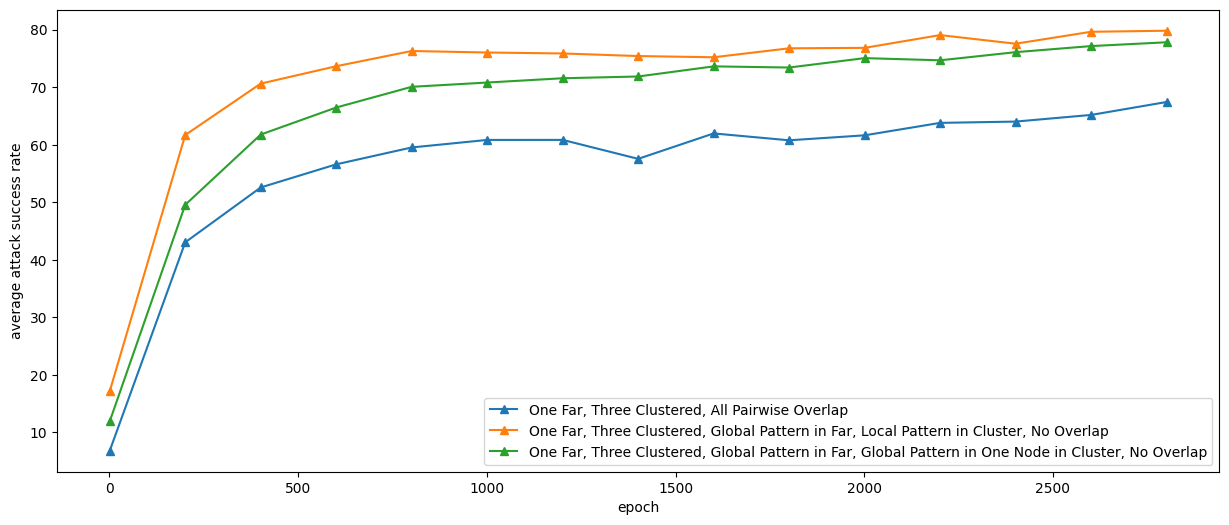

In [82]:
folders = ['Output/DBA-ring-swift-iid-DBA-4-3001/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-4-1g3l-3000/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-4-1g1g-3000-old/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_together(folders, 40, legends)

### clique ring

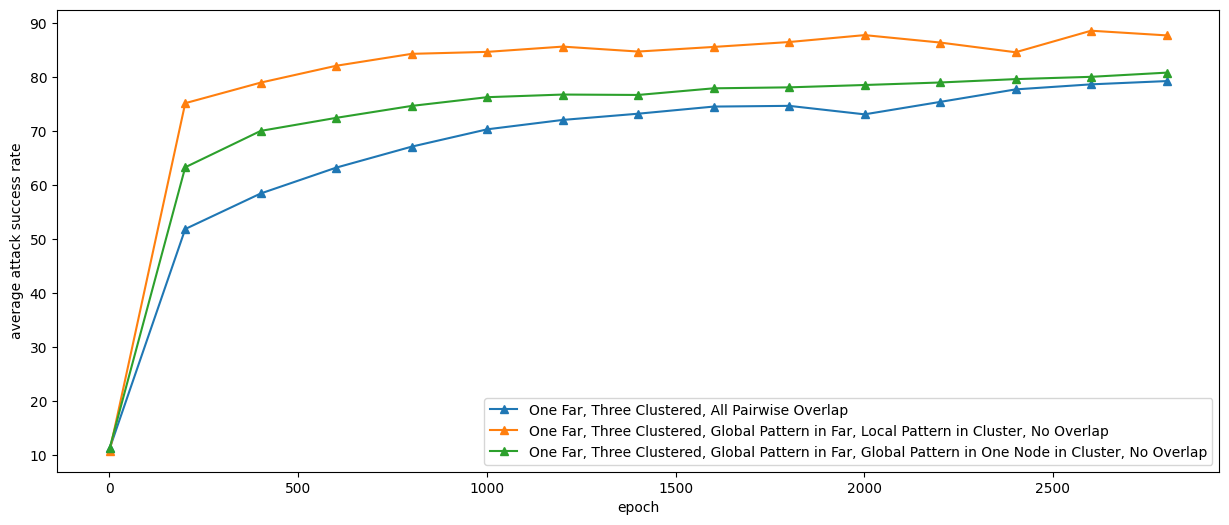

In [83]:
folders = ['Output/DBA-clique-ring-swift-iid-DBA-4-3001/adv3-all/',
           'Output/DBA-clique-ring-swift-iid-DBA-4-1g3l-3000/adv3-all/',
           'Output/DBA-clique-ring-swift-iid-DBA-4-1g1g-3000/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_together(folders, 40, legends)

## MNIST

### ring

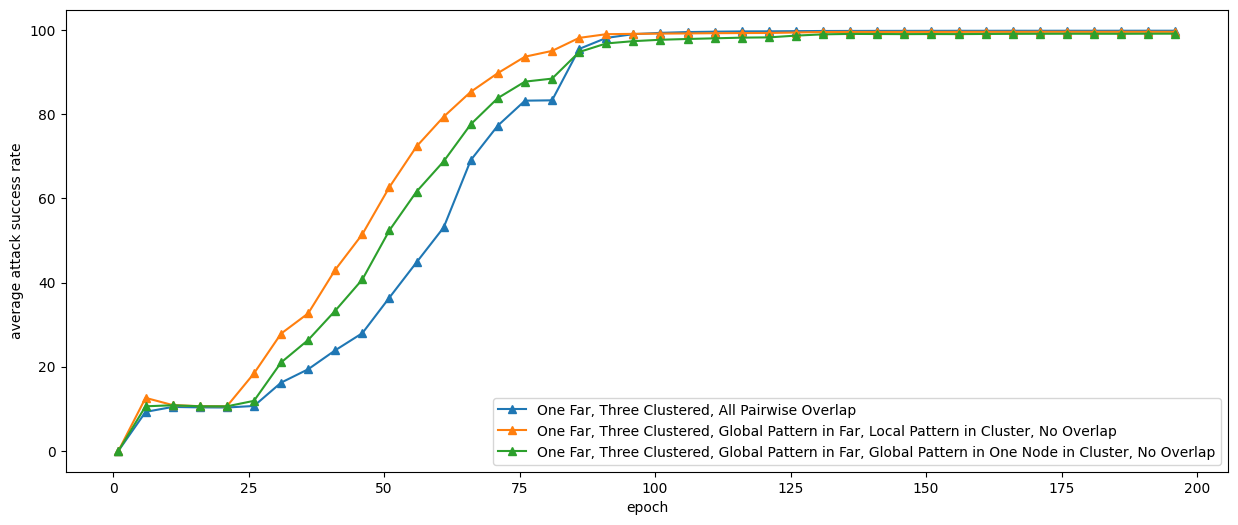

In [88]:
folders = ['Output/DBA-ring-swift-iid-DBA-mnist-4-200/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-mnist-4-1g3l-200/adv3-all/',
           'Output/DBA-ring-swift-iid-DBA-mnist-4-1g1g-200/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_mnist_together(folders, 40, legends)

### clique ring

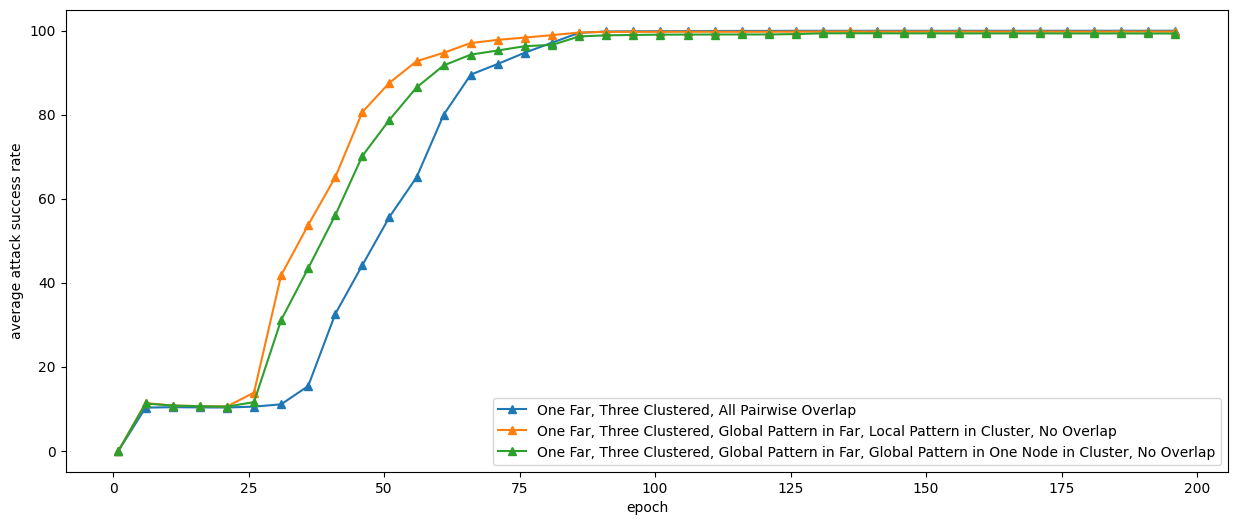

In [89]:
folders = ['Output/DBA-clique-ring-swift-iid-DBA-mnist-4-200/adv3-all/',
           'Output/DBA-clique-ring-swift-iid-DBA-mnist-4-1g3l-200/adv3-all/',
           'Output/DBA-clique-ring-swift-iid-DBA-mnist-4-1g1g-200/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_mnist_together(folders, 40, legends)

# DSGD

## CIFAR

### ring

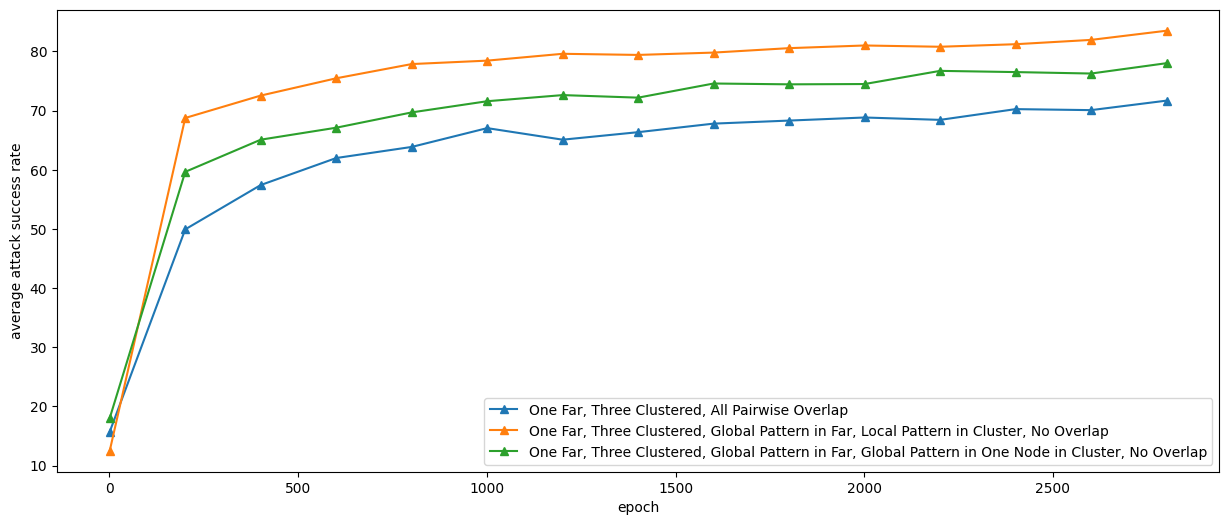

In [90]:
folders = ['Output/DBA-ring-dsgd-iid-DBA-4-3000/adv3-all/',
           'Output/DBA-ring-dsgd-iid-DBA-4-1g3l-3000/adv3-all/',
           'Output/DBA-ring-dsgd-iid-DBA-4-1g1g-3000/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_together(folders, 40, legends)

### clique ring

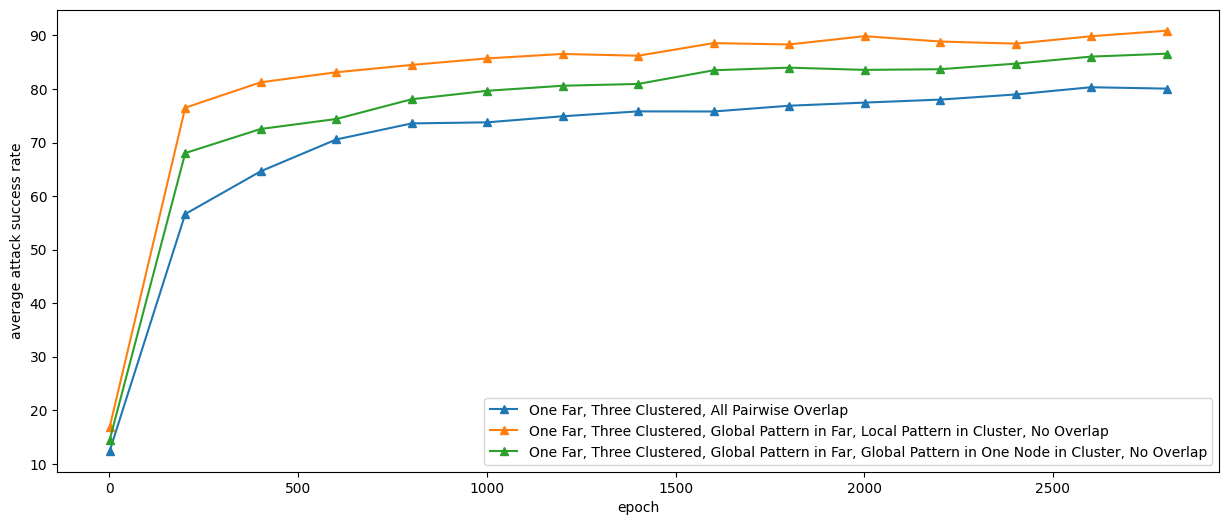

In [92]:
folders = ['Output/DBA-clique-ring-dsgd-iid-DBA-4-3000/adv3-all/',
           'Output/DBA-clique-ring-dsgd-iid-DBA-4-1g3l-3000/adv3-all/',
           'Output/DBA-clique-ring-dsgd-iid-DBA-4-1g1g-3000/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_together(folders, 40, legends)

## MNIST

### ring

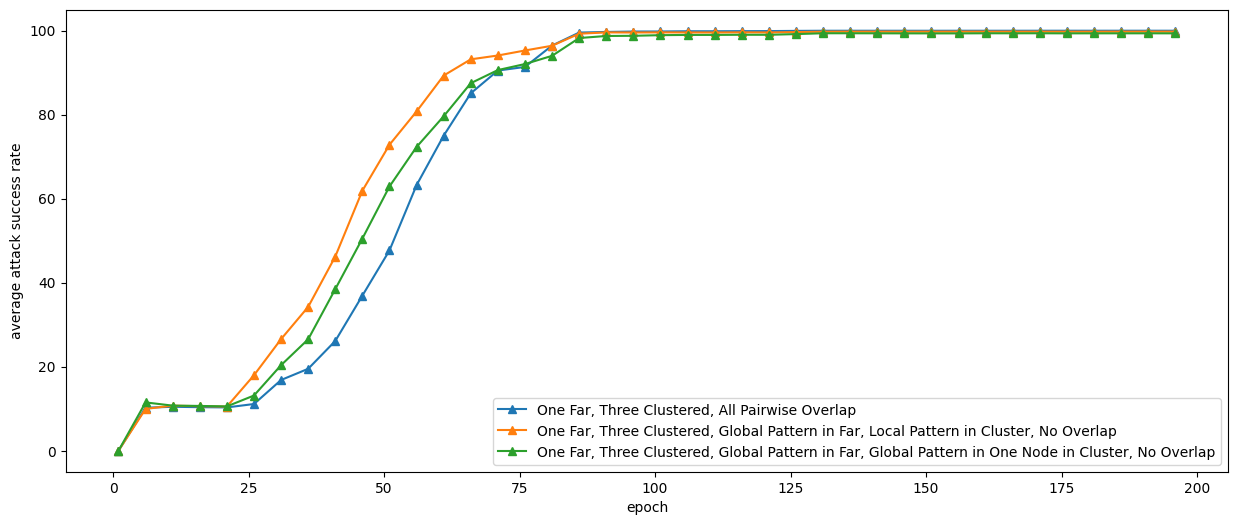

In [93]:
folders = ['Output/DBA-ring-dsgd-iid-DBA-mnist-4-200/adv3-all/',
           'Output/DBA-ring-dsgd-iid-DBA-mnist-4-1g3l-200/adv3-all/',
           'Output/DBA-ring-dsgd-iid-DBA-mnist-4-1g1g-200/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_mnist_together(folders, 40, legends)

### clique ring

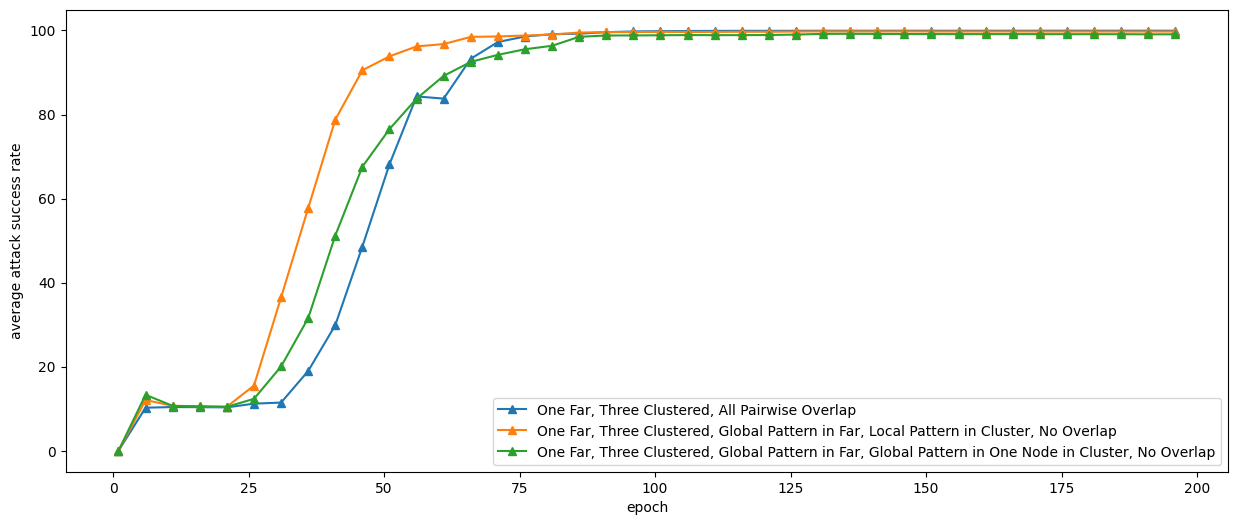

In [94]:
folders = ['Output/DBA-clique-ring-dsgd-iid-DBA-mnist-4-200/adv3-all/',
           'Output/DBA-clique-ring-dsgd-iid-DBA-mnist-4-1g3l-200/adv3-all/',
           'Output/DBA-clique-ring-dsgd-iid-DBA-mnist-4-1g1g-200/adv3-all/']
legends = ['One Far, Three Clustered, All Pairwise Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Local Pattern in Cluster, No Overlap', 
           'One Far, Three Clustered, Global Pattern in Far, Global Pattern in One Node in Cluster, No Overlap']
draw_mnist_together(folders, 40, legends)

### ring 20, global pattern, all

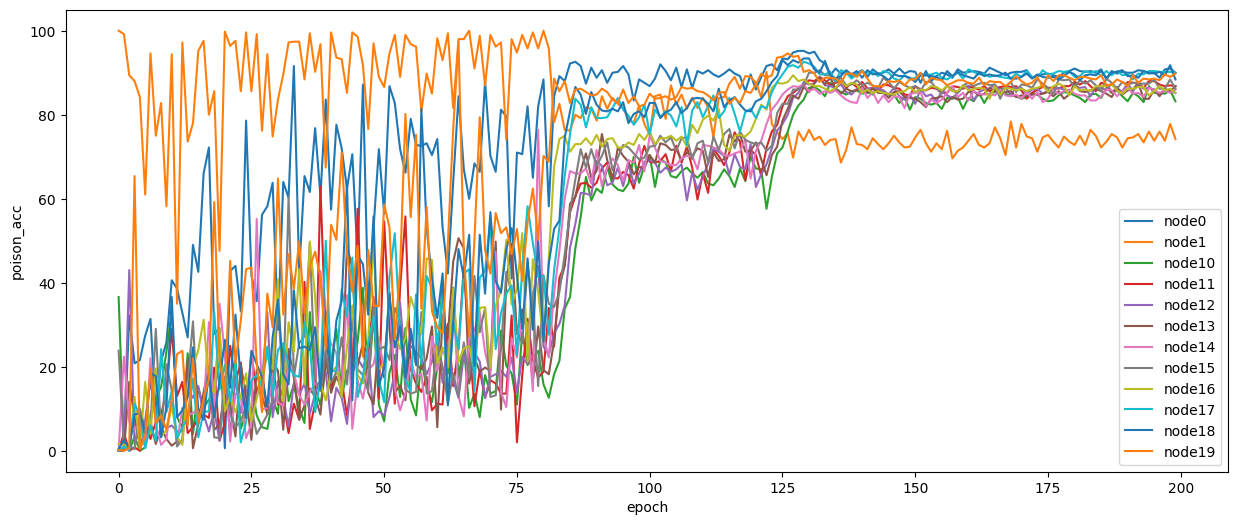

In [76]:
nodes = [0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
draw_nodes('Output/DBA-ring-swift-iid-DBA-datasets-ring20-all-200/adv3-all/', nodes)

### ring 20, global pattern, stop at 100

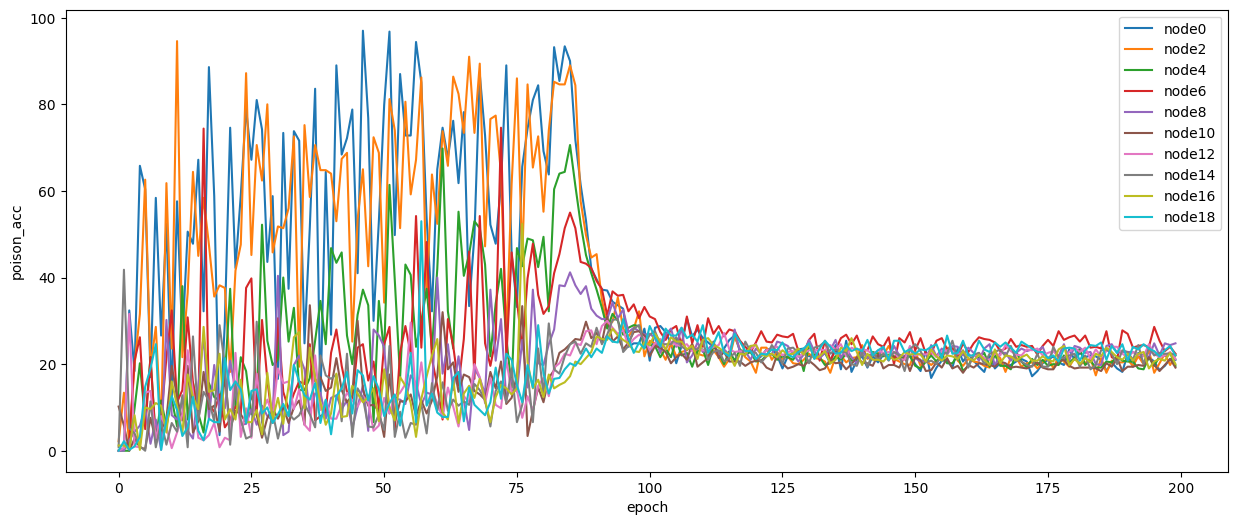

In [71]:
nodes = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
draw_nodes('Output/DBA-linear-swift-iid-DBA-datasets-stop-at-100-200/adv3-all/', nodes)

### ring 20, out of domain, alt3 

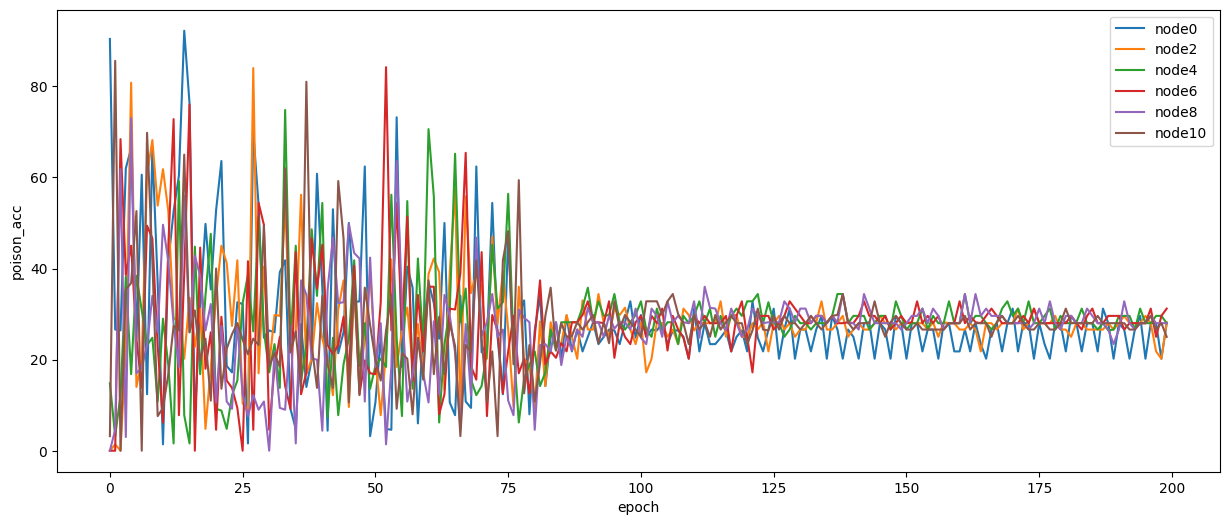

In [67]:
nodes = [0, 2, 4, 6, 8, 10]
draw_nodes('Output/DBA-ring-single-attack-8-alt3-200/adv3-shark/', nodes)

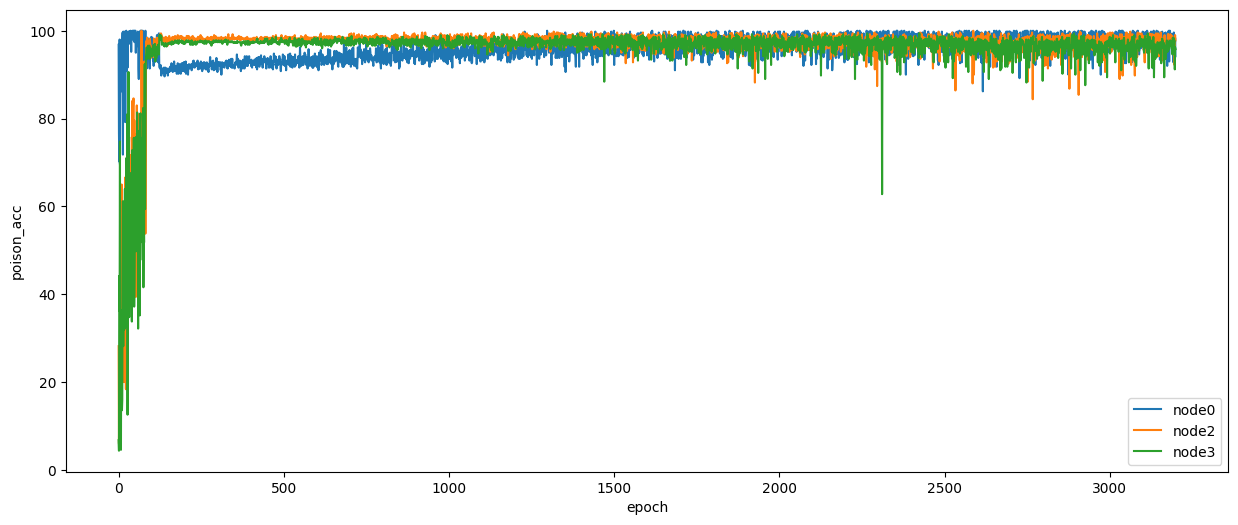

In [100]:
nodes = [0, 2, 3]
draw_nodes('Sequences/bkd-dsgd-all-ring10-3200/', nodes)